# Ejercicio 2

En este ejercicio definiremos una función que realice una ampliación a la imagen, generando valores para los pixeles que se deberan incluir.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

imagen = cv.imread('soluciones/ej1-25%.png',cv.IMREAD_GRAYSCALE)

In [2]:
def amplia(img):
    
    R = 2
    i = 0
    
    # Paso inicial: Creamos una matriz R veces mas grande que la original.
    resimg = np.zeros([img.shape[0]*R,img.shape[1]*R])
    
    # Paso 1: Incorporamos los valores de la imagen original en sus posiciones correspondientes.
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            resimg[i*R,j*R] = img[i,j]
    print("Paso I")
    print(resimg)
    print()
    
    # Paso 2: Aplicamos una interpolación linear por columnas.
    for i in range(1,resimg.shape[0]-1,2):
        for j in range(0,resimg.shape[1],2):
             resimg[i,j] = np.round((resimg[i-1,j]+resimg[i+1,j])/2)
    print("Paso II")
    print(resimg)
    print()
    
    # Paso 3: Aplicamos una interpolación linear por filas.
    for i in range(resimg.shape[0]):
        for j in range(1,resimg.shape[1]-1,2):
             resimg[i,j] = np.round((resimg[i,j-1]+resimg[i,j+1])/2)
    print("Paso III")
    print(resimg)
    print()
    
    # Paso 4: Copiamos los valores de la penúltima columna en la última.
    for i in range(resimg.shape[0]):
         resimg[i,-1] = resimg[i,-2]
    print("Paso IV")
    print(resimg)
    print()
    
    # Paso 5: Copiamos los valores de la penúltima fila en la última.
    resimg[-1] = resimg[-2]
    print("Paso V")
    print(resimg)
    print()
    
    return resimg

In [3]:
ejemplo = np.array([
    [12,17,32],
    [26,17,40],
    [14,20,27]
])
print(ejemplo)

[[12 17 32]
 [26 17 40]
 [14 20 27]]


In [4]:
ae = amplia(ejemplo)

Paso I
[[12.  0. 17.  0. 32.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [26.  0. 17.  0. 40.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [14.  0. 20.  0. 27.  0.]
 [ 0.  0.  0.  0.  0.  0.]]

Paso II
[[12.  0. 17.  0. 32.  0.]
 [19.  0. 17.  0. 36.  0.]
 [26.  0. 17.  0. 40.  0.]
 [20.  0. 18.  0. 34.  0.]
 [14.  0. 20.  0. 27.  0.]
 [ 0.  0.  0.  0.  0.  0.]]

Paso III
[[12. 14. 17. 24. 32.  0.]
 [19. 18. 17. 26. 36.  0.]
 [26. 22. 17. 28. 40.  0.]
 [20. 19. 18. 26. 34.  0.]
 [14. 17. 20. 24. 27.  0.]
 [ 0.  0.  0.  0.  0.  0.]]

Paso IV
[[12. 14. 17. 24. 32. 32.]
 [19. 18. 17. 26. 36. 36.]
 [26. 22. 17. 28. 40. 40.]
 [20. 19. 18. 26. 34. 34.]
 [14. 17. 20. 24. 27. 27.]
 [ 0.  0.  0.  0.  0.  0.]]

Paso V
[[12. 14. 17. 24. 32. 32.]
 [19. 18. 17. 26. 36. 36.]
 [26. 22. 17. 28. 40. 40.]
 [20. 19. 18. 26. 34. 34.]
 [14. 17. 20. 24. 27. 27.]
 [14. 17. 20. 24. 27. 27.]]



### Para comprobar esta función, usaremos la imagen diezmada al 25% que hemos generado en el ejercicio anterior.

In [5]:
ampliacion = amplia(imagen)

Paso I
[[ 25.   0.  26. ...   0.  12.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [ 26.   0.  26. ...   0.  13.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [ 66.   0.  77. ...   0. 160.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]

Paso II
[[ 25.   0.  26. ...   0.  12.   0.]
 [ 26.   0.  26. ...   0.  12.   0.]
 [ 26.   0.  26. ...   0.  13.   0.]
 ...
 [ 74.   0.  84. ...   0. 136.   0.]
 [ 66.   0.  77. ...   0. 160.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]

Paso III
[[ 25.  26.  26. ...  13.  12.   0.]
 [ 26.  26.  26. ...  13.  12.   0.]
 [ 26.  26.  26. ...  14.  13.   0.]
 ...
 [ 74.  79.  84. ... 137. 136.   0.]
 [ 66.  72.  77. ... 146. 160.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]

Paso IV
[[ 25.  26.  26. ...  13.  12.  12.]
 [ 26.  26.  26. ...  13.  12.  12.]
 [ 26.  26.  26. ...  14.  13.  13.]
 ...
 [ 74.  79.  84. ... 137. 136. 136.]
 [ 66.  72.  77. ... 146. 160. 160.]
 [  0.   0.   0. ...   0.   0.   0.]]

Paso V
[[ 25.  26.  26. ...  13.  12.  12.]
 [ 26.  

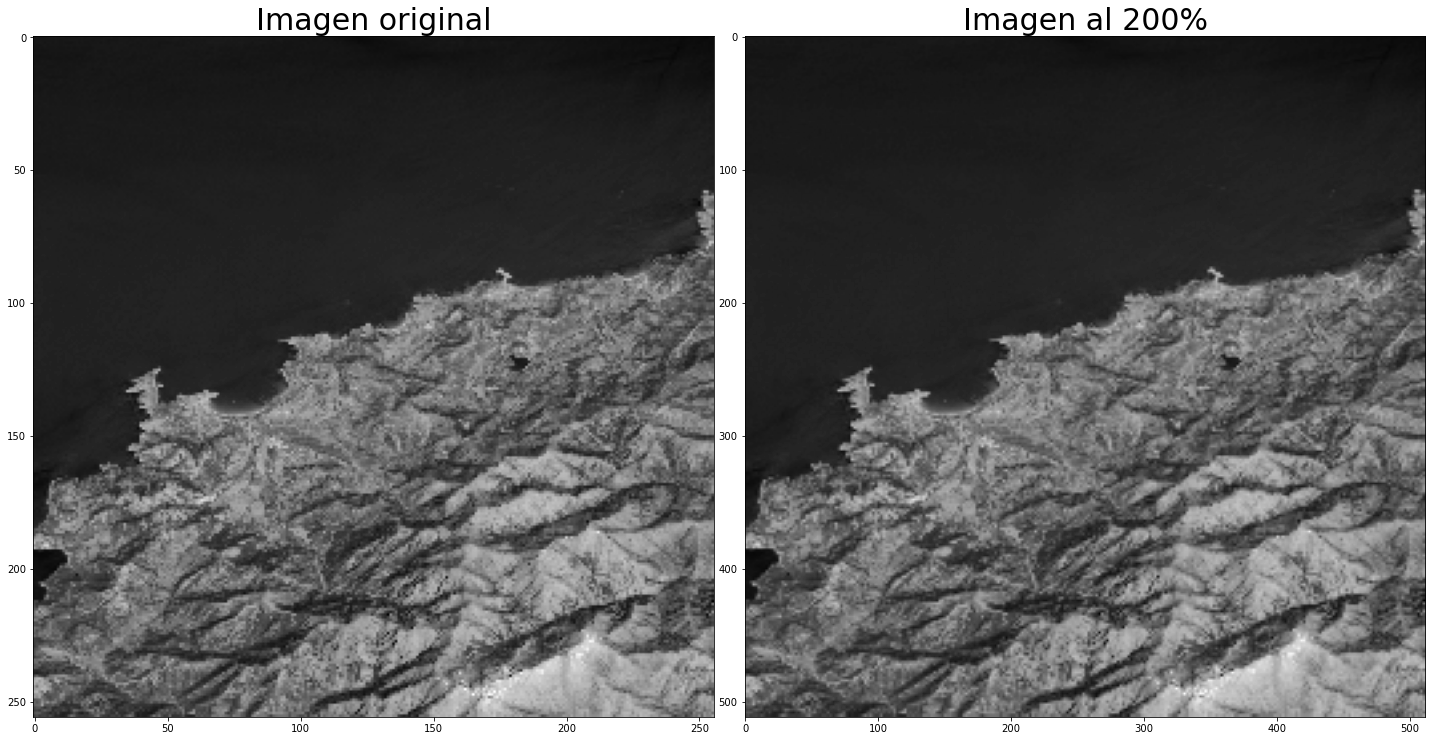

In [6]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title("Imagen original", fontsize = 30)

plt.subplot(2, 2, 2)
plt.imshow(ampliacion, cmap='gray')
plt.title("Imagen al 200%", fontsize = 30)

plt.tight_layout()
plt.show()

### Al igual que en el ejercicio anterior, no podemos apreciar facilmente la diferencia mirando en jupyter notebook, por lo que guardaremos la imagen de forma externa.

In [7]:
cv.imwrite("soluciones/ej2-200%.png", ampliacion)

True